# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

Component  | Insufficient | Satisfactory | Excellent
--- | --- | --- | ---
**Code** | Missing or incomplete code structure, runs with errors, lacks documentation | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s>
**Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words | Correct, conveys excellent level of understanding, makes connections between topics

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [20]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [21]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]

print(X.shape)
print(Y.shape)

(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [22]:
# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

***Answer***: `np.newaxis` helps to put the 1D array into the right format (a 2D column).

Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [23]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [24]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

# Predict on the test set
y_pred = X_test @ beta[1:] + beta[0]

# Compute mean squared error
mse = np.mean((y_test - y_pred) ** 2)
print("Mean squared error on test set:", mse)

[[ 152.34779643]
 [ -16.57338609]
 [-254.66343751]
 [ 560.9894609 ]
 [ 278.90965232]
 [-393.45557666]
 [  97.08855335]
 [ -18.9842756 ]
 [ 169.46616165]
 [ 632.96847103]
 [ 114.21833048]]
Mean squared error on test set: 2794.587000834292


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

***Answer***:

$$
J(\mathbf{B})=(\mathbf{Y}-\mathbf{X}\mathbf{B})^{\top},\mathbf{W},(\mathbf{Y}-\mathbf{X}\mathbf{B}),\quad
\mathbf{W}=\mathrm{diag}(d_1,\dots,d_n).
$$

$$
\frac{\partial J}{\partial \mathbf{B}}
=-2,\mathbf{X}^{\top}\mathbf{W}(\mathbf{Y}-\mathbf{X}\mathbf{B})=\mathbf{0}
;\Rightarrow;
\mathbf{X}^{\top}\mathbf{W}\mathbf{X},\hat{\mathbf{B}}=\mathbf{X}^{\top}\mathbf{W}\mathbf{Y}.
$$

$$
\boxed{\hat{\mathbf{B}}=(\mathbf{X}^{\top}\mathbf{W}\mathbf{X})^{-1},\mathbf{X}^{\top}\mathbf{W}\mathbf{Y}}
\qquad
\text{(en voor één doelvariabele } \mathbf{y}:;
\hat{\boldsymbol{\beta}}=(\mathbf{X}^{\top}\mathbf{W}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{W}\mathbf{y},).
$$

### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

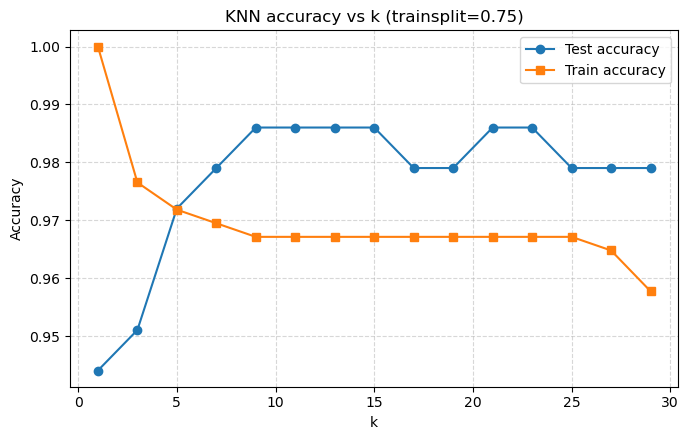

Best k: 9 | Test accuracy: 0.9860


In [25]:
import numpy as np
from knn_scratch import KNN

# load the breast cancer dataset
X = breast_cancer.data
y = breast_cancer.target[:, np.newaxis]

knn = KNN(X, y, k=5, trainsplit=0.75)
knn.test_train_split()
knn.normalize_train_test()

# Plot accuracy vs k
k_values = list(range(1, 30, 2))  # only odd values of k to avoid ties
train_acc, test_acc = knn.evaluate_over_k(k_values, plot=True)

best_k = k_values[int(np.argmax(test_acc))]
print(f"Best k: {best_k} | Test accuracy: {test_acc.max():.4f}")



### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

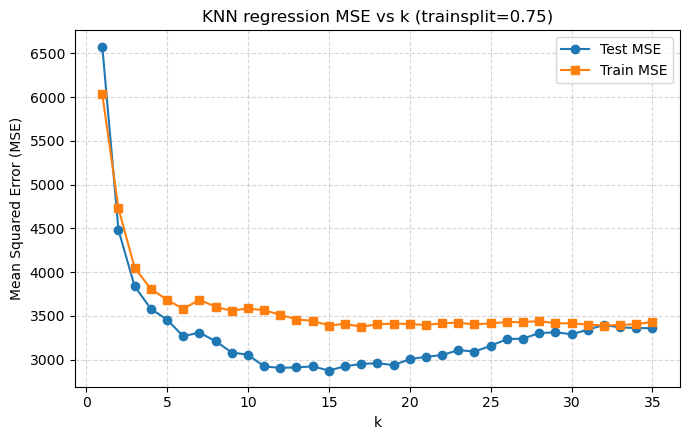

Best k: 15 | Test MSE: 2875.295


In [26]:
import numpy as np
from knn_scratch import KNNRegressor   

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1)        

knn_reg = KNNRegressor(X, y, k=5, trainsplit=0.75)
knn_reg.test_train_split()
knn_reg.normalize_train_test()

# Plot MSE vs k
k_values = list(range(1, 36))          
train_mse, test_mse = knn_reg.evaluate_over_k(k_values, plot=True)

best_k = k_values[int(np.argmin(test_mse))]
print(f"Best k: {best_k} | Test MSE: {test_mse.min():.3f}")


=== Comparison on the diabetes dataset ===
Best k (k-NN): 15
k-NN  Test MSE: 2875.295 | R^2: 0.532
Linear Regression Test MSE: 2774.772 | R^2: 0.548


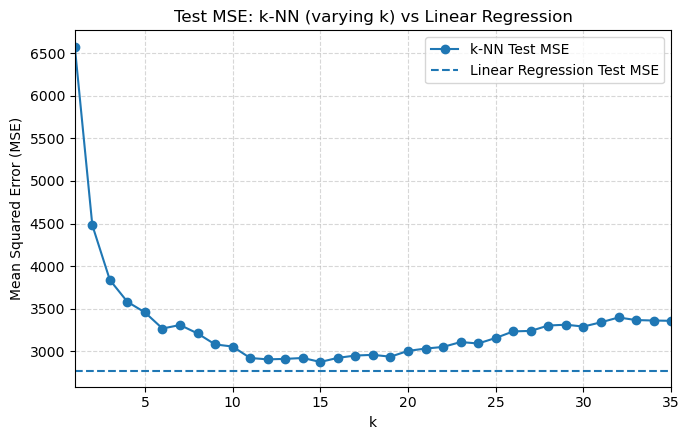

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from knn_scratch import KNNRegressor

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1)

# k-NN regressor
knn_reg = KNNRegressor(X, y, k=5, trainsplit=0.75)
knn_reg.test_train_split()
knn_reg.normalize_train_test()

# Evaluate k values
k_values = list(range(1, 36))
train_mse, test_mse = knn_reg.evaluate_over_k(k_values, plot=False)
best_k = k_values[int(np.argmin(test_mse))]
y_pred_best = knn_reg.predict(knn_reg.X_test, k=best_k)
knn_test_mse = float(test_mse.min())
knn_r2 = r2_score(knn_reg.y_test, y_pred_best)

# Linear regression (on the same normalized features)
lin = LinearRegression()
lin.fit(knn_reg.X_train, knn_reg.y_train)
lin_pred_te = lin.predict(knn_reg.X_test)
lin_test_mse = mean_squared_error(knn_reg.y_test, lin_pred_te)
lin_r2 = r2_score(knn_reg.y_test, lin_pred_te)

print("=== Comparison on the diabetes dataset ===")
print(f"Best k (k-NN): {best_k}")
print(f"k-NN  Test MSE: {knn_test_mse:.3f} | R^2: {knn_r2:.3f}")
print(f"Linear Regression Test MSE: {lin_test_mse:.3f} | R^2: {lin_r2:.3f}")

# Plot comparison
plt.figure(figsize=(7,4.5))
plt.plot(k_values, test_mse, marker='o', label='k-NN Test MSE')
plt.hlines(lin_test_mse, k_values[0], k_values[-1], linestyles='--',
           label='Linear Regression Test MSE')
plt.xlabel('k'); plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE: k-NN (varying k) vs Linear Regression')
plt.xlim(k_values[0], k_values[-1])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


This experiment shows the performance of k-Nearest Neighbors regression compared to Linear Regression on the diabetes dataset. The evaluation was based on Mean Squared Error (MSE), where lower values indicate better performance, and the R² score, where higher values reflect a better fit. For k-NN regression, the best performance was achieved at k = 15, resulting in a test MSE of about 2875 and an R² score of 0.532. Linear Regression performed slightly better, with a test MSE of about 2775 and an R² score of 0.548.
The plot illustrates how the test error of k-NN changes as the value of k increases. With very small values of k, such as k = 1, the model overfits the training data, which leads to a very high test error. As k increases, the error decreases and stabilizes around k values between 11 and 15, where the model achieves its best performance. Beyond this point, as k becomes larger, the model starts to oversmooth the data, and the error gradually rises again. The dashed horizontal line in the plot represents the performance of Linear Regression, which lies just below the lowest test error of k-NN. This indicates that Linear Regression provides slightly better predictive performance on this dataset.
In summary, the results suggest that both models perform well, with Linear Regression having a small edge. However, k-NN with an appropriately chosen k can come very close to matching its performance, showing that it is a flexible method but highly dependent on the choice of the parameter k.

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#e8c6c6ff'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>




Top 5 features by Fisher score:
  worst concave points | Fisher=3.405, AUC=0.967
  worst perimeter | Fisher=2.825, AUC=0.975
  mean concave points | Fisher=2.715, AUC=0.964
  worst radius | Fisher=2.712, AUC=0.970
  mean perimeter | Fisher=2.263, AUC=0.947

Top 5 features by Bhattacharyya distance:
  worst concave points | Bhatta=0.868, AUC=0.967
  worst perimeter | Bhatta=0.844, AUC=0.975
  worst area | Bhatta=0.824, AUC=0.970
  mean concave points | Bhatta=0.814, AUC=0.964
  worst radius | Bhatta=0.814, AUC=0.970

Top 5 features by univariate AUC:
  worst perimeter | AUC=0.975, Fisher=2.825
  worst radius | AUC=0.970, Fisher=2.712
  worst area | AUC=0.970, Fisher=1.949
  worst concave points | AUC=0.967, Fisher=3.405
  mean concave points | AUC=0.964, Fisher=2.715

Best single feature (by AUC): worst perimeter | AUC=0.975


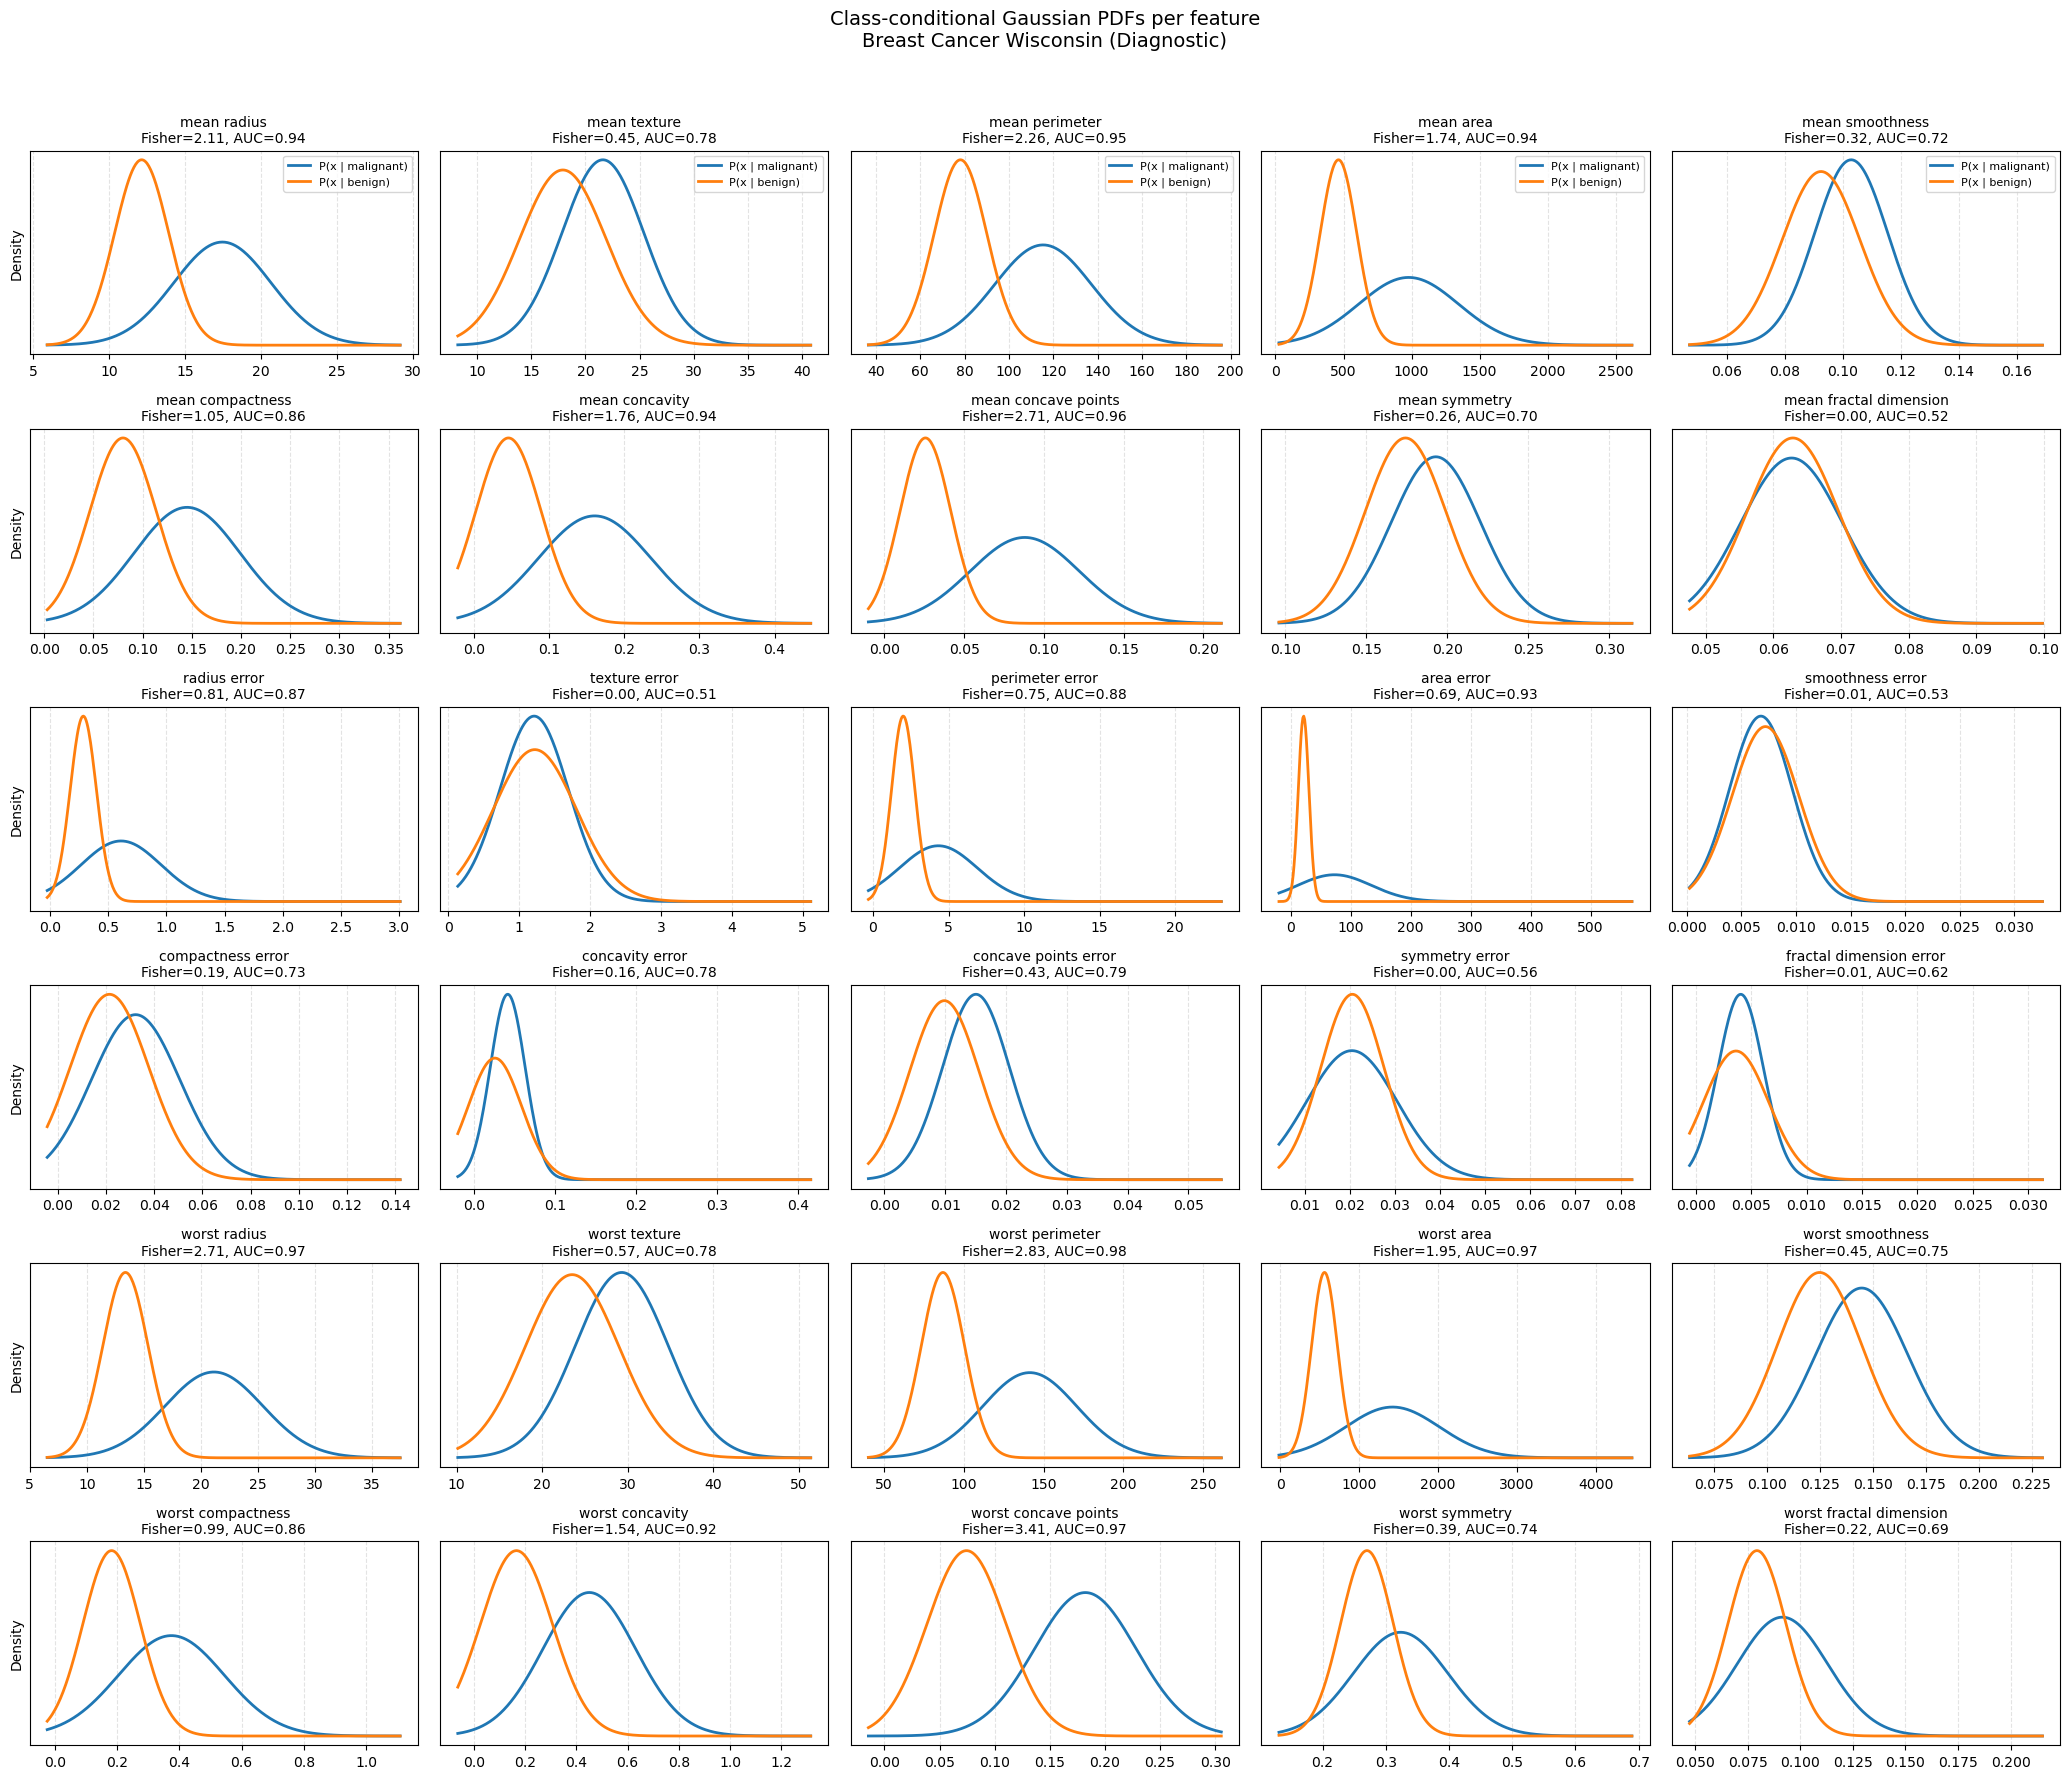

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

# ---------- helpers ----------
def gaussian_pdf(x, mu, sigma):
    sigma = np.maximum(sigma, 1e-12)  # avoid divide-by-zero
    return 1.0 / (np.sqrt(2*np.pi) * sigma) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def fisher_score(mu0, mu1, s0, s1):
    # Larger is better (greater separation relative to spread)
    return (mu1 - mu0)**2 / (s0**2 + s1**2 + 1e-12)

def bhattacharyya_distance(mu0, mu1, s0, s1):
    # Closed form for two 1D Gaussians
    term1 = 0.25 * np.log(0.25 * (s0**2 / (s1**2 + 1e-12) + s1**2 / (s0**2 + 1e-12) + 2.0))
    term2 = 0.25 * ((mu0 - mu1)**2) / (s0**2 + s1**2 + 1e-12)
    return term1 + term2  # Larger => more separable (less overlap)

# ---------- data ----------
data = load_breast_cancer()
X = data.data
y = data.target            # 0 = malignant, 1 = benign (per sklearn dataset)
feature_names = data.feature_names

# Split indices per class
idx0 = (y == 0)  # malignant
idx1 = (y == 1)  # benign

# Precompute class-conditional Gaussian params
mu0 = X[idx0].mean(axis=0)
mu1 = X[idx1].mean(axis=0)
s0  = X[idx0].std(axis=0, ddof=0)
s1  = X[idx1].std(axis=0, ddof=0)

# Scores for ranking features
fisher = fisher_score(mu0, mu1, s0, s1)
bhatta = bhattacharyya_distance(mu0, mu1, s0, s1)

# Also compute a simple univariate ROC AUC per feature:
# We use the raw feature as a score; if AUC < 0.5, flip sign so we can rank by separability.
auc_list = []
for j in range(X.shape[1]):
    auc = roc_auc_score(y, X[:, j])
    auc = max(auc, 1 - auc)
    auc_list.append(auc)
auc = np.array(auc_list)

# Rank features by each criterion
top_fisher_idx = np.argsort(fisher)[::-1]
top_bhatta_idx = np.argsort(bhatta)[::-1]
top_auc_idx    = np.argsort(auc)[::-1]

print("\nTop 5 features by Fisher score:")
for i in top_fisher_idx[:5]:
    print(f"  {feature_names[i]} | Fisher={fisher[i]:.3f}, AUC={auc[i]:.3f}")

print("\nTop 5 features by Bhattacharyya distance:")
for i in top_bhatta_idx[:5]:
    print(f"  {feature_names[i]} | Bhatta={bhatta[i]:.3f}, AUC={auc[i]:.3f}")

print("\nTop 5 features by univariate AUC:")
for i in top_auc_idx[:5]:
    print(f"  {feature_names[i]} | AUC={auc[i]:.3f}, Fisher={fisher[i]:.3f}")

best_idx = top_auc_idx[0]  # or use top_fisher_idx[0]
print(f"\nBest single feature (by AUC): {feature_names[best_idx]} | AUC={auc[best_idx]:.3f}")

# ---------- visualization of class-conditional Gaussians ----------
n_features = X.shape[1]
ncols = 5
nrows = int(np.ceil(n_features / ncols))

plt.figure(figsize=(ncols*4.2, nrows*2.9))
for j in range(n_features):
    # make a reasonable x-range for the pdfs (min/max with margin)
    x_min = X[:, j].min()
    x_max = X[:, j].max()
    pad = 0.05 * (x_max - x_min + 1e-9)
    xs = np.linspace(x_min - pad, x_max + pad, 400)

    pdf0 = gaussian_pdf(xs, mu0[j], s0[j])
    pdf1 = gaussian_pdf(xs, mu1[j], s1[j])

    ax = plt.subplot(nrows, ncols, j + 1)
    ax.plot(xs, pdf0, label='P(x | malignant)', linewidth=2)
    ax.plot(xs, pdf1, label='P(x | benign)', linewidth=2)
    ax.set_title(f"{feature_names[j]}\n"
                 f"Fisher={fisher[j]:.2f}, AUC={auc[j]:.2f}", fontsize=10)
    ax.set_yticks([])
    ax.grid(True, linestyle='--', alpha=0.35)
    if j % ncols == 0:
        ax.set_ylabel("Density")
    if j // ncols == 0:
        ax.legend(fontsize=8, loc='upper right')

plt.suptitle("Class-conditional Gaussian PDFs per feature\nBreast Cancer Wisconsin (Diagnostic)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()
